In [2]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20)  # Adjust based on your CPU coresl ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"


In [3]:
cat = intake.open_esm_datastore(url)
cat

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [4]:
cesm2 = cat.search(
    activity_id = 'OMIP',
    source_id = 'CESM2',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['volcello', "areacello", 'ph']
)
cesm2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
1,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,volcello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
2,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802


In [5]:
dset_dict = cesm2.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


{'OMIP.NCAR.CESM2.omip1.Omon.gr': <xarray.Dataset>
 Dimensions:         (lat: 180, d2: 2, lev: 33, lon: 360, member_id: 1,
                      dcpp_init_year: 1, time: 3720)
 Coordinates:
   * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
     lat_bnds        (lat, d2) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
   * lev             (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
     lev_bnds        (lev, d2) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
   * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
     lon_bnds        (lon, d2) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
   * time            (time) object 0001-01-15 13:00:00.999998 ... 0310-12-15 1...
     time_bnds       (time, d2) object dask.array<chunksize=(3720, 2), meta=np.ndarray>
   * member_id       (member_id) object 'r1i1p1f1'
   * dcpp_init_year  (dcpp_init_year) float64 nan
 Dimensions without coordinates: d2
 Data 

In [6]:
e = dset_dict['OMIP.NCAR.CESM2.omip1.Ofx.gr']
e

<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 180, lon: 360,
                     d2: 2, lev: 33)
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds        (lat, d2) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev             (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
    lev_bnds        (lev, d2) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    lon_bnds        (lon, d2) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: d2
Data variables:
    areacello       (member_id, dcpp_init_year, lat, lon) float64 dask.array<chunksize=(1, 1, 180, 360), meta=np.ndarray>
    volcello        (member_id, dcpp_init_year, lev, lat, lon) float64 dask.array<chunksize=(1, 1, 33, 180, 360), meta=np.ndarray>
Attributes: (12/55)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      OMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    case_id:                          1541
    ...                               ...
    intake_esm_attrs:table_id:        Ofx
    intake_esm_attrs:grid_label:      gr
    intake_esm_attrs:version:         20190802
    intake_esm_attrs:_data_format_:   zarr
    external_variables:               areacello volcello
    intake_esm_dataset_key:           OMIP.NCAR.CESM2.omip1.Ofx.gr

In [8]:
volumes = e['volcello'].isel(lev=0)
areas = e['areacello']
total_volume = volumes.sum(dim=['lat', 'lon'])
total_area = areas.sum(dim=['lat', 'lon'])

In [9]:
ph = dset_dict['OMIP.NCAR.CESM2.omip1.Omon.gr'].ph
ph

<xarray.DataArray 'ph' (member_id: 1, dcpp_init_year: 1, time: 3720, lat: 180,
                        lon: 360)>
dask.array<getitem, shape=(1, 1, 3720, 180, 360), dtype=float32, chunksize=(1, 1, 11, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev             float64 0.0
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time            (time) object 0001-01-15 13:00:00.999998 ... 0310-12-15 1...
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    negative log10 of hydrogen ion concentration with the con...
    frequency:      mon
    id:             ph
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          pH
    type:           real
    units:          1
    variable_id:    ph

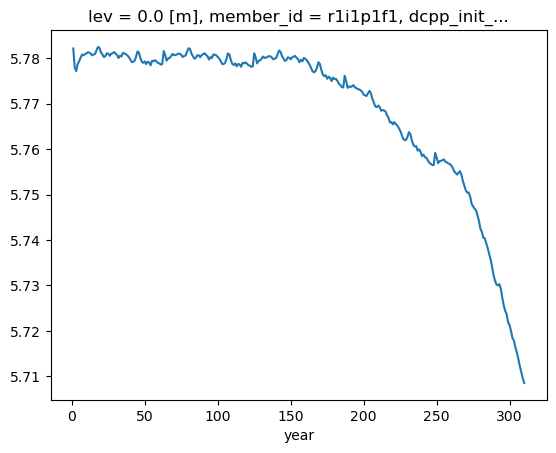

In [10]:
mean_ph = ((ph.isel(level=0).groupby('time.year').mean() * volumes).sum(dim=['lat', 'lon']) / total_volume)
mean_ph.plot()

In [12]:
search = cat.search(
    activity_id = 'OMIP',
    member_id = 'r1i1p1f1',
    variable_id = ['dissic', 'no3', 'ph', 'so']
)
search.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
2,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,so,gn,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
3,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,so,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
4,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
5,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
6,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,so,gn,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
7,OMIP,NOAA-GFDL,GFDL-OM4p5B,omip1,r1i1p1f1,Omon,so,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-OM4p5B/om...,NaN,20180701
8,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802
9,OMIP,NCAR,CESM2,omip1,r1i1p1f1,Omon,ph,gn,gs://cmip6/CMIP6/OMIP/NCAR/CESM2/omip1/r1i1p1f...,NaN,20190802


In [13]:
dset_dict = search.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


{'OMIP.MIROC.MIROC6.omip1.Omon.gn': <xarray.Dataset>
 Dimensions:             (y: 256, x: 360, time: 3720, lev: 63, bnds: 2,
                          member_id: 1, dcpp_init_year: 1, vertices: 4)
 Coordinates: (12/14)
     latitude            (y, x) float64 dask.array<chunksize=(256, 360), meta=np.ndarray>
   * lev                 (lev) float64 1.0 3.5 7.0 ... 6.24e+03 6.87e+03 7.25e+03
     lev_bnds            (lev, bnds) float64 dask.array<chunksize=(63, 2), meta=np.ndarray>
     longitude           (y, x) float64 dask.array<chunksize=(256, 360), meta=np.ndarray>
     sigma_bnds          (lev, bnds) float64 dask.array<chunksize=(63, 2), meta=np.ndarray>
   * time                (time) object 1700-01-16 12:00:00 ... 2009-12-16 12:0...
     ...                  ...
     x_bnds              (x, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
   * y                   (y) float64 -88.0 -85.75 -85.25 ... 148.6 150.5 152.4
     y_bnds              (y, bnds) float64 dask.array

In [15]:
[key for key in dset_dict.keys()][:10]

['OMIP.MIROC.MIROC6.omip1.Omon.gn',
 'OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gn',
 'OMIP.NCAR.CESM2.omip1.Omon.gr',
 'OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gn',
 'OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr',
 'OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gr',
 'OMIP.NCAR.CESM2.omip1.Omon.gn',
 'OMIP.IPSL.IPSL-CM6A-LR.omip1.Omon.gn']

In [19]:
for name in [key for key in dset_dict.keys()][:10]:
    print('\n')
    print(name)
    print(dset_dict[name].data_vars.values())



OMIP.MIROC.MIROC6.omip1.Omon.gn
ValuesView(Data variables:
    depth               (y, x) float32 dask.array<chunksize=(256, 360), meta=np.ndarray>
    depth_c             float64 ...
    eta                 (time, y, x) float32 dask.array<chunksize=(17, 256, 360), meta=np.ndarray>
    nsigma              int32 ...
    sigma               (lev) float64 dask.array<chunksize=(63,), meta=np.ndarray>
    so                  (member_id, dcpp_init_year, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 17, 63, 256, 360), meta=np.ndarray>
    vertices_latitude   (y, x, vertices) float64 dask.array<chunksize=(256, 360, 4), meta=np.ndarray>
    vertices_longitude  (y, x, vertices) float64 dask.array<chunksize=(256, 360, 4), meta=np.ndarray>
    zlev                (lev) float64 dask.array<chunksize=(63,), meta=np.ndarray>)


OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gn
ValuesView(Data variables:
    so       (member_id, dcpp_init_year, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 2, 35, 1

In [25]:
for var in dset_dict['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr'].values():
    print(var.isel(lev=0).groupby('time.year').mean())

<xarray.DataArray 'dissic' (member_id: 1, dcpp_init_year: 1, year: 300,
                            lat: 180, lon: 360)>
dask.array<transpose, shape=(1, 1, 300, 180, 360), dtype=float32, chunksize=(1, 1, 1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lev             float64 2.5
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
  * year            (year) int64 1708 1709 1710 1711 ... 2004 2005 2006 2007
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Inorganic Carbon Concentration
    original_name:  dissic
    standard_name:  mole_concentration_of_dissolved_inorgan

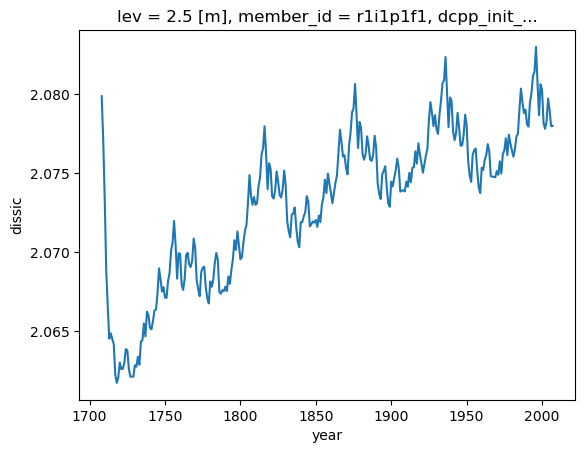

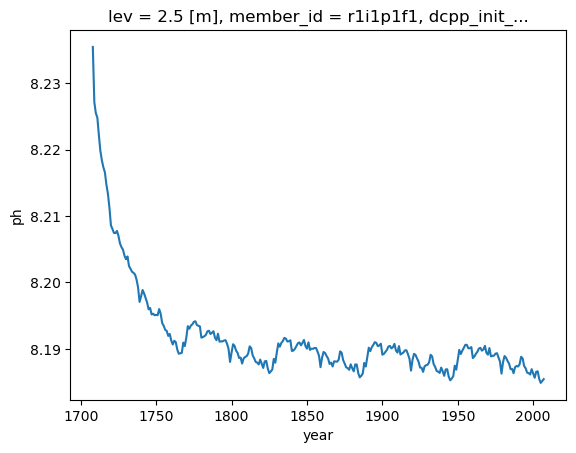

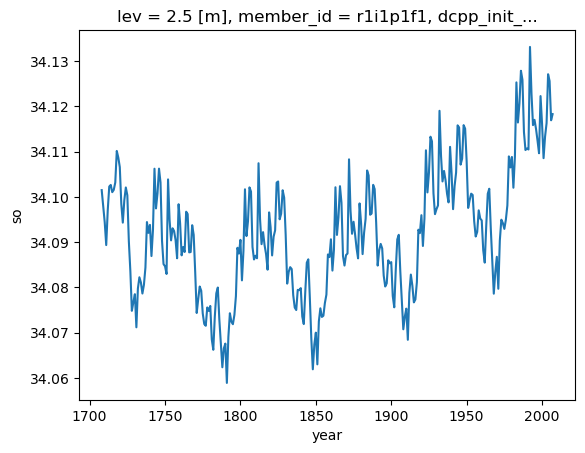

In [23]:
for var in dset_dict['OMIP.NOAA-GFDL.GFDL-OM4p5B.omip1.Omon.gr'].values():
    try:
        var.isel(lev=0).mean(dim=('lat','lon')).groupby('time.year').mean().plot()
        plt.show()
    except:
        try:
            var.isel(lev_partial=0).mean(dim=('lat','lon')).groupby('time.year').mean().plot()
            plt.show()
        except:
            var.mean(dim=('lat','lon')).groupby('time.year').mean().plot()
            plt.show()